#                                **ML-BreastCancer-Classification**

#                                  Sreeja Macha, Colin Chen, Jessica Yang

## 1. **Data Exploration and Visualization**
- Explore the Breast Cancer Dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold

# Load the Breast Cancer dataset into a pandas DataFrame
cancer_df = pd.read_csv("Cancer.csv")

# Remove any 'Unnamed' columns
cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^Unnamed')]

# Drop the 'id' column as it is not useful for analysis
cancer_df = cancer_df.drop(columns = 'id')

# Drop any rows with missing values
cancer_df = cancer_df.dropna()

In [ ]:
# Display the first 6 rows of the DataFrame
print(cancer_df.head(6))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   
5          0.12780           0.17000          0.1578  

In [ ]:
# Display the DataFrame's structure, data types, and non-null value counts
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Output summary statistics for all columns in the DataFrame
print(cancer_df.describe(include='all'))

       diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000   

In [ ]:
# Calculate the percentage of each diagnosis category in the dataset
diagnosis_percentage = cancer_df['diagnosis'].value_counts(normalize=True) * 100

# Display the percentage of each diagnosis category
print(diagnosis_percentage)

print("Within the Breast Cancer dataset, 62.74% of the cases are Benign (B), and 37.25% are Malignant (M). This distribution shows a higher prevalence of benign cases in the dataset.")

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64
Within the Breast Cancer dataset, 62.74% of the cases are Benign (B), and 37.25% are Malignant (M). This distribution shows a higher prevalence of benign cases in the dataset.


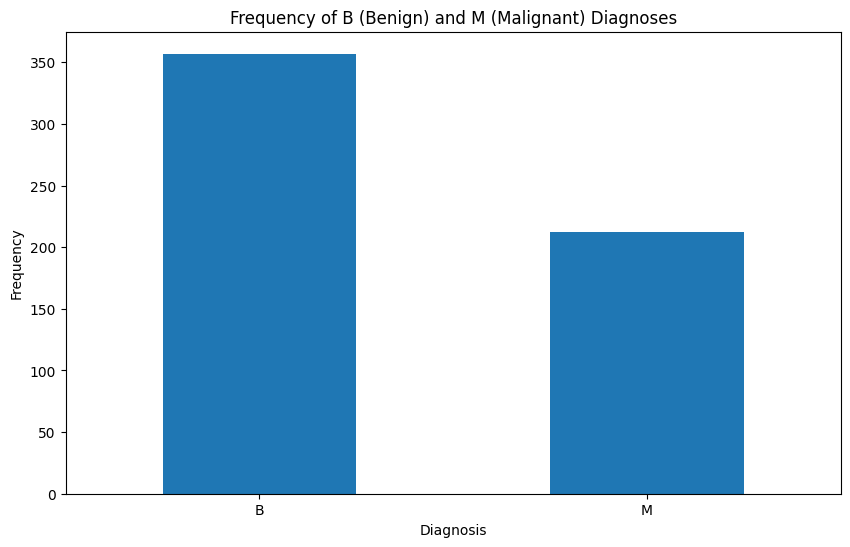

The bar plot shows a higher count of benign cases compared to malignant ones within the dataset, indicating a prevalence of benign diagnoses.


In [ ]:
# Create a bar plot for the frequency of B (Benign) and M (Malignant) diagnoses

# Get the counts of each diagnosis category
diagnosis_counts = cancer_df['diagnosis'].value_counts()

plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Frequency of B (Benign) and M (Malignant) Diagnoses')
plt.xticks(rotation=0)
plt.show()

print("The bar plot shows a higher count of benign cases compared to malignant ones within the dataset, indicating a prevalence of benign diagnoses.")

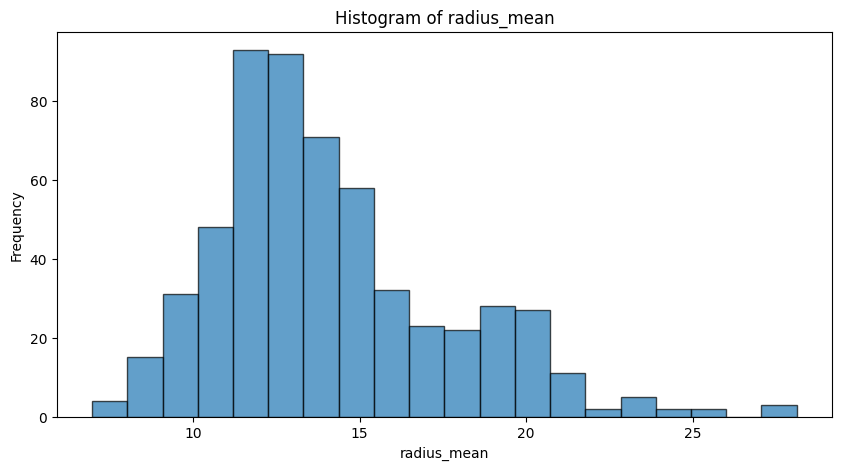

The histogram shows the distribution of 'radius_mean' across the dataset with a right-skewed pattern, indicating that most tumors have a smaller average radius, with fewer instances of larger radius.


In [ ]:
# Create a histogram to visualize the distribution of 'radius_mean' feature
plt.figure(figsize=(10, 5))
plt.hist(cancer_df['radius_mean'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")
plt.show()
print("The histogram shows the distribution of 'radius_mean' across the dataset with a right-skewed pattern, indicating that most tumors have a smaller average radius, with fewer instances of larger radius.")

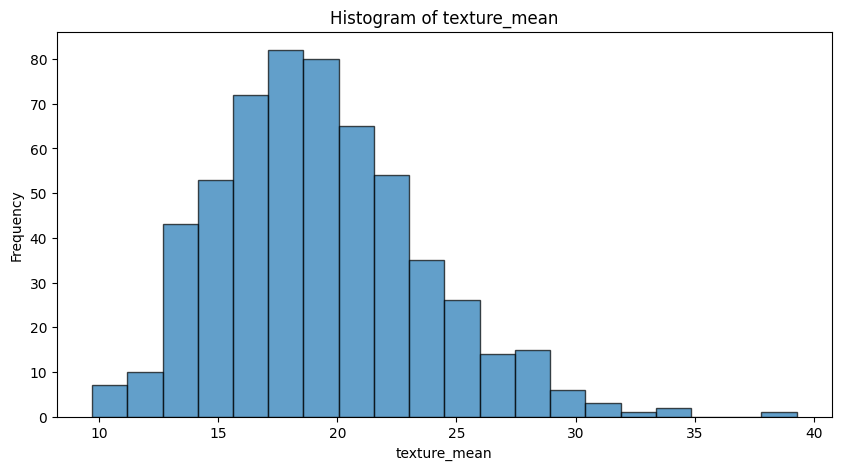

The histogram displays the distribution of 'texture_mean' with a peak around the mid-range values and tails off towards higher values, suggesting a normal to mildly right-skewed distribution.


In [ ]:
# Create a histogram to visualize the distribution of 'texture_mean' feature
plt.figure(figsize=(10, 5))
plt.hist(cancer_df['texture_mean'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of texture_mean")
plt.xlabel("texture_mean")
plt.ylabel("Frequency")
plt.show()
print("The histogram displays the distribution of 'texture_mean' with a peak around the mid-range values and tails off towards higher values, suggesting a normal to mildly right-skewed distribution.")

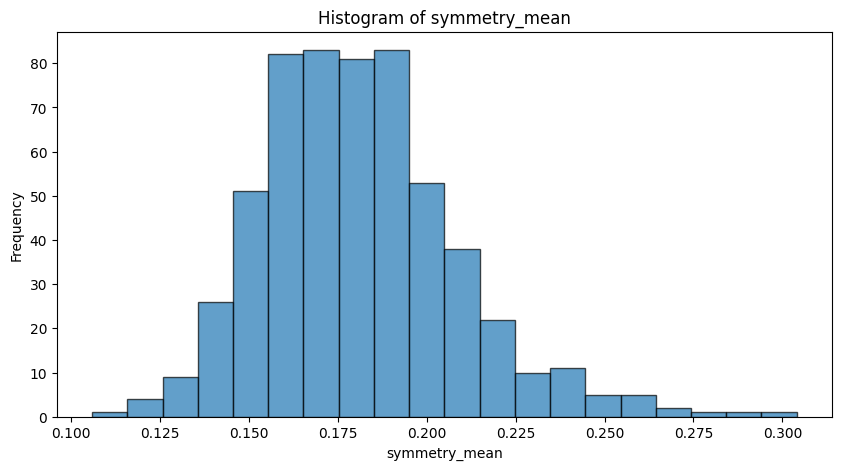

The histogram of 'symmetry_mean' in the breast cancer dataset suggests that most cases have a moderate level of symmetry, with the majority of values concentrated around the mean. A slight right skew indicates there are some cases with higher symmetry, but these are less common.


In [ ]:
# Create a histogram to visualize the distribution of 'symmetry_mean' feature
plt.figure(figsize=(10, 5))
plt.hist(cancer_df['symmetry_mean'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of symmetry_mean")
plt.xlabel("symmetry_mean")
plt.ylabel("Frequency")
plt.show()

print("The histogram of 'symmetry_mean' in the breast cancer dataset suggests that most cases have a moderate level of symmetry, with the majority of values concentrated around the mean. A slight right skew indicates there are some cases with higher symmetry, but these are less common.")

<ipython-input-66-1b4aefb8ce28>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cancer_df['diagnosis'], y=cancer_df['radius_mean'], palette=colors)


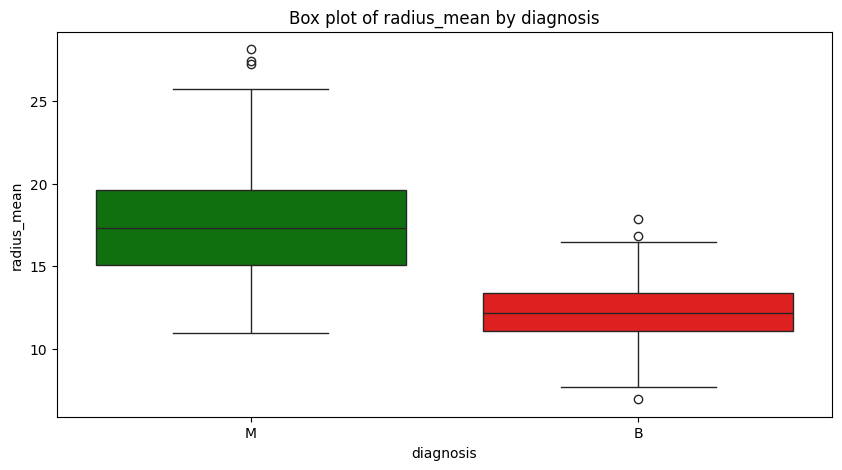

The box plot shows that malignant tumors (M) tend to have a higher average radius mean compared to benign tumors (B), as indicated by the higher median and larger spread of the green box (Malignant). There are also outliers present in both categories.


In [ ]:
# Define colors for the categories in the 'diagnosis' column
colors = {"M": "green", "B": "red"}

# Create a box plot to compare 'radius_mean' across the diagnosis categories
plt.figure(figsize=(10, 5))
sns.boxplot(x=cancer_df['diagnosis'], y=cancer_df['radius_mean'], palette=colors)
plt.xlabel("diagnosis")
plt.ylabel("radius_mean")
plt.title("Box plot of radius_mean by diagnosis")
plt.show()

print("The box plot shows that malignant tumors (M) tend to have a higher average radius mean compared to benign tumors (B), as indicated by the higher median and larger spread of the green box (Malignant). There are also outliers present in both categories.")

<ipython-input-67-9ebb1ff812b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cancer_df['diagnosis'], y=cancer_df['texture_mean'], palette=colors)


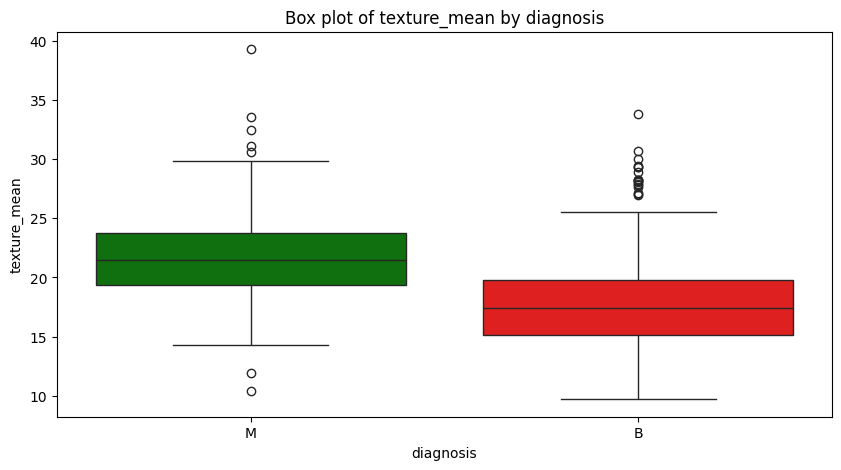

The box plot suggests a greater 'texture_mean' for malignant cases (M) over benign (B), with both categories having variability and several outliers.


In [ ]:
# Create a box plot to compare 'texture_mean' across the diagnosis categories
plt.figure(figsize=(10, 5))
sns.boxplot(x=cancer_df['diagnosis'], y=cancer_df['texture_mean'], palette=colors)
plt.xlabel("diagnosis")
plt.ylabel("texture_mean")
plt.title("Box plot of texture_mean by diagnosis")
plt.show()

print("The box plot suggests a greater 'texture_mean' for malignant cases (M) over benign (B), with both categories having variability and several outliers.")

## 2. **Logistic Regression Model Development**
- Develop a logistic regression model to predict whether cancer is malignant or benign.
- Preprocess the data as necessary (handling missing values, encoding categorical variables, etc.).
- Explain the steps you took in preparing the data and developing the model.
- You might need to encode the values for your prediction.

In [ ]:
# Check for missing values
missing_values = cancer_df.isnull().sum()
missing_values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Encode 'diagnosis' column into a binary variable
if set(cancer_df['diagnosis'].unique()) == {'M', 'B'}:
    cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M': 0, 'B': 1})

cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Prepare the dataset for modeling
X = cancer_df.drop('diagnosis', axis=1)
X = sm.add_constant(X)
y = cancer_df['diagnosis']

# Fit a logistic regression model to the data
full_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Display the summary
full_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      538
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 May 2024   Deviance:                       921.03
Time:                        20:40:40   Pearson chi2:                 4.50e+16
No. Iterations:                    33   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.056e+16   1.22e+08   1.69e+08      0.000    2.06e+16    2.06e+16
radius_mean              4.029e+15   4.93e+07   8.17e+07      0.000    4.03e+15    4.03e+15
texture_mean            -9.764e+12   2.26e+06  -4.33e+06      0.000   -9.76e+12   -9.76e+12
perimeter_mean           -4.89e+14   7.13e+06  -6.86e+07      0.000   -4.89e+14   -4.89e+14
area_mean               -7.809e+12   1.49e+05  -5.23e+07      0.000   -7.81e+12   -7.81e+12
smoothness_mean         -3.359e+16   5.73e+08  -5.86e+07      0.000   -3.36e+16   -3.36e+16
compactness_mean         3.699e+16   3.79e+08   9.76e+07      0.000     3.7e+16     3.7e+16
concavity_mean           7.826e+15   2.97e+08   2.63e+07      0.000    7.83e+15    7.83e+15
concave_points_mean     -1.689e+16   5.62e+08     -3e+07      0.000   -1.69e+16   -1.69e+16
symmetry_mean            7.224e+15   2.11e+08   3.42e+07      0.000    7.22e+15    7.22e+15
fractal_dimension_mean  -6.308e+16   1.58e+09  -3.98e+07      0.000   -6.31e+16   -6.31e+16
radius_se               -1.068e+16   8.82e+07  -1.21e+08      0.000   -1.07e+16   -1.07e+16
texture_se               3.419e+14   1.05e+07   3.27e+07      0.000    3.42e+14    3.42e+14
perimeter_se             1.172e+15   1.17e+07      1e+08      0.000    1.17e+15    1.17e+15
area_se                 -2.141e+12   3.97e+05  -5.39e+06      0.000   -2.14e+12   -2.14e+12
smoothness_se            6.019e+16   1.88e+09    3.2e+07      0.000    6.02e+16    6.02e+16
compactness_se          -3.617e+16   6.16e+08  -5.87e+07      0.000   -3.62e+16   -3.62e+16
concavity_se             2.808e+16    3.7e+08    7.6e+07      0.000    2.81e+16    2.81e+16
concave_points_se       -2.014e+17   1.55e+09   -1.3e+08      0.000   -2.01e+17   -2.01e+17
symmetry_se              2.634e+16   7.75e+08    3.4e+07      0.000    2.63e+16    2.63e+16
fractal_dimension_se     3.012e+17   3.32e+09   9.08e+07      0.000    3.01e+17    3.01e+17
radius_worst            -9.245e+14   1.65e+07  -5.61e+07      0.000   -9.25e+14   -9.25e+14
texture_worst           -1.221e+14   1.97e+06  -6.19e+07      0.000   -1.22e+14   -1.22e+14
perimeter_worst         -1.011e+14   1.69e+06     -6e+07      0.000   -1.01e+14   -1.01e+14
area_worst               1.126e+13   9.08e+04   1.24e+08      0.000    1.13e+13    1.13e+13
smoothness_worst        -5.403e+15   4.08e+08  -1.33e+07      0.000    -5.4e+15    -5.4e+15
compactness_worst        3.441e+15   1.09e+08   3.16e+07      0.000    3.44e+15    3.44e+15
concavity_worst         -8.144e+15   7.63e+07  -1.07e+08      0.000   -8.14e+15   -8.14e+15
concave_points_worst     5.044e+15    2.6e+08   1.94e+07      0.000    5.04e+15    5.04e+15
symmetry_worst          -7.016e+15    1.4e+08     -5e+07      0.000   -7.02e+15   -7.02e+15
fractal_dimension_worst -9.479e+15   6.77e+08  

## Full model results:
1. Upon fitting the logistic regression model (incl. all the predictor variables) to the data, we encountered significant multicollinearity among the predictors, as shown by inflated standard errors.
2. This undermines the reliability of the coefficient estimates, which may not accurately represent the relationship between the predictors and the dependent variable.

## Subsequent stages:
1. To address multicollinearity, I've removed highly correlated predictors (with VIF >10) from the model in the subsequent stages.
2. A 10% threshold is a balance between being too lenient and too strict. So I chose q = 0.1 to perform FDR control and get significant predictors.
3. I then fit a new logistic model with only the significant predictors to the data.

In [ ]:
# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Set the threshlold for VIF to 10
threshold_vif = 10

# Remove columns with VIF greater than the threshold
while True:
    vif = calculate_vif(X)
    max_vif = vif['VIF'].max()
    if max_vif > threshold_vif:
        feature_to_remove = vif[vif['VIF'] == max_vif]['feature'].values[0]
        X.drop(columns=[feature_to_remove], inplace=True)
    else:
        break

 # Add a constant for the intercept
X = sm.add_constant(X)

# Fit a logistic regression model to the data
full_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Calculate R-squared for the model
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
print("R^2 of the model is:", r_squared)

# Display the summary of the logistic regression model
full_model.summary()

R^2 of the model is: 0.8379038773633135


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      561
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.903
Date:                Mon, 13 May 2024   Deviance:                       121.81
Time:                        20:40:41   Pearson chi2:                     177.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6693
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.3344      1.595      7.734      0.000       9.209      15.460
texture_se              -0.1000      0.535     -0.187      0.852      -1.148       0.948
area_se                 -0.2126      0.029     -7.262      0.000      -0.270      -0.155
smoothness_se         -381.7182    121.049     -3.153      0.002    -618.970    -144.466
concavity_se            96.4839     26.657      3.619      0.000      44.236     148.731
symmetry_se             -3.0558     33.601     -0.091      0.928     -68.912      62.800
fractal_dimension_se   711.5756    224.072      3.176      0.001     272.403    1150.748
concavity_worst        -27.6310      3.776     -7.318      0.000     -35.031     -20.230
========================================================================================
"""

In [ ]:
# Extract p-values for each predictor in the model
p_values = full_model.pvalues[1:]
p_values

texture_se              8.516400e-01
area_se                 3.802717e-13
smoothness_se           1.613723e-03
concavity_se            2.952802e-04
symmetry_se             9.275362e-01
fractal_dimension_se    1.494946e-03
concavity_worst         2.519751e-13
dtype: float64

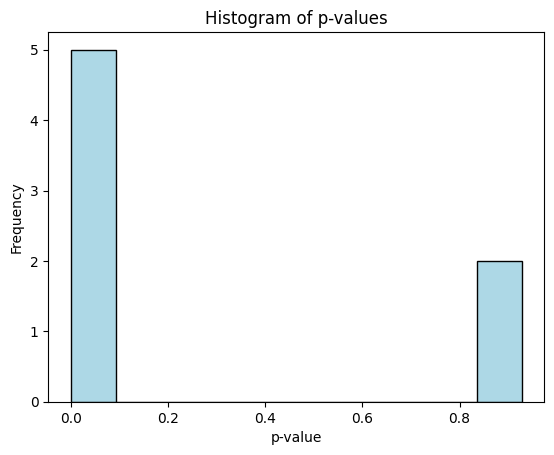

The histogram shows a large number of predictors have p-values close to 0, indicating significant results. There are also a few with p-values around 0.8, suggesting non-significance.


In [ ]:
# Plot a histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

print("The histogram shows a large number of predictors have p-values close to 0, indicating significant results. There are also a few with p-values around 0.8, suggesting non-significance.")

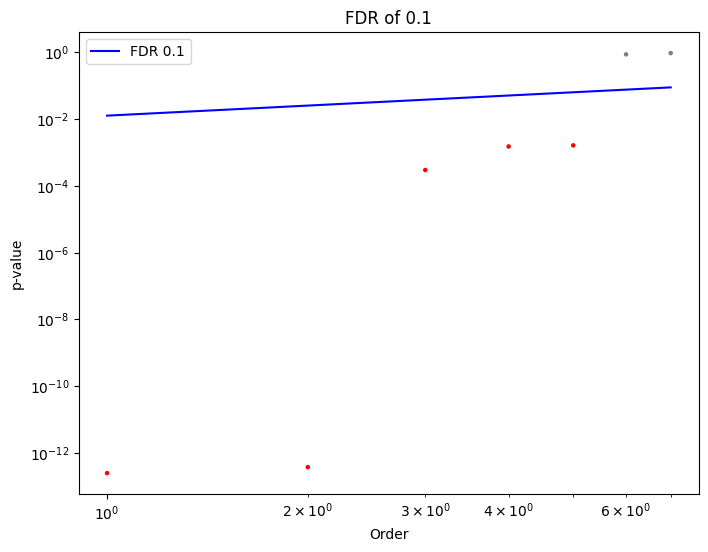

The cut-off p-value at 10% FDR is: 0.0016


In [ ]:
# Determine the threshold p-value at a given FDR level and plot the p-values.
# Parameters:
    # pvals (list or array): A list or array of p-values.
    # q (float): The desired FDR level.
# Returns:
    # float: The threshold p-value at the given FDR level.

def fdr_cut(pvals, q=0.1):
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

# Apply the function to determine the threshold p-value at 10% FDR
threshold = fdr_cut(p_values)
print(f"The cut-off p-value at 10% FDR is: {threshold:.4f}")

In [ ]:
# Identify significant predictors based on the cut-off p-value
significant_predictors = p_values[p_values <= 0.0016].index.tolist()

# Prepare the data for the new model
selected_columns = ['diagnosis'] + significant_predictors
X_cut = cancer_df[selected_columns].drop('diagnosis', axis=1)
X_cut = sm.add_constant(X_cut)  # Add a constant (intercept) to the predictors
y_cut = cancer_df['diagnosis']

# Fit a logistic regression model using only the significant predictors
cut_model = sm.GLM(y_cut, X_cut, family=sm.families.Binomial()).fit()

print(f"Significant predictors are: {significant_predictors}")

# Calculate the R^2 value for the new model
r_squared_cut = 1 - (cut_model.deviance / cut_model.null_deviance)

print(f"R^2 value of the model is: {r_squared_cut:.4f}")

Significant predictors are: ['area_se', 'concavity_se', 'fractal_dimension_se', 'concavity_worst']
R^2 value of the model is: 0.8226


## 3. **Model Evaluation**
- Evaluate your logistic regression model using appropriate metrics (e.g., accuracy, R^2, RMSE (all out-of-sample)).
- Split the dataset into training and testing sets to perform this evaluation.
- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [ ]:
# Import necessary libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X_cut, y_cut, test_size=0.2, random_state=42)

# Fit the Logistic Regression model on the training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Calculate predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the residual deviance for the model
residual_deviance = -2 * log_loss(y_test, y_pred_prob, normalize=False)

# Fit the null model (a model with only an intercept)
null_model = LogisticRegression()
null_model.fit(np.ones((X_train.shape[0], 1)), y_train)
y_null_pred_prob = null_model.predict_proba(np.ones((X_test.shape[0], 1)))[:, 1]

# Calculate the null deviance
null_deviance = -2 * log_loss(y_test, y_null_pred_prob, normalize=False)

# Calculate R^2
r_squared = 1 - (residual_deviance / null_deviance)

# Calculate the RMSE of the model
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Evaluation results based on an 80-20 train-test split:")
print(f'Accuracy: {accuracy:.4f}')
print(f'R^2: {r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')

Evaluation results based on an 80-20 train-test split:
Accuracy: 0.9474
R^2: 0.7770
RMSE: 0.2294



The logistic regression model demonstrates a very high predictive ability with an accuracy of 94.74%.

Its R-squared value of 77.70% indicates a strong fit, suggesting the model effectively captures a significant portion of the data's variance.

A low RMSE of 0.2294 indicates precise predictions with minimal error, suggesting that the model is robust and reliable for this dataset.

## 4. **Testing Interactions Between Features**
- Explore and test the interactions between different features in the dataset. Pay particular attention to interactions involving both categorical/dummy and continuous variables.
- For this excercise, use a linear regression rather than a logistic regression model.
- Discuss issues that occur when using a linear regression model to predict binary outcomes.
- Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
- Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
- Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


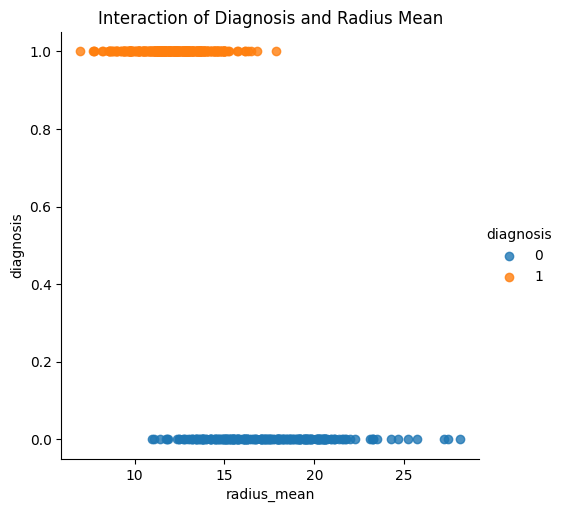

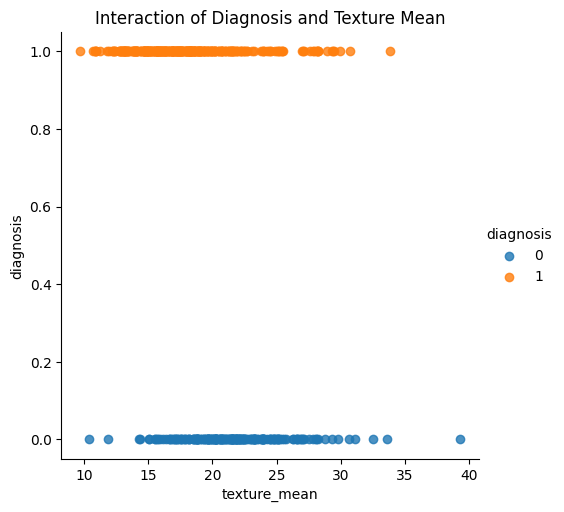

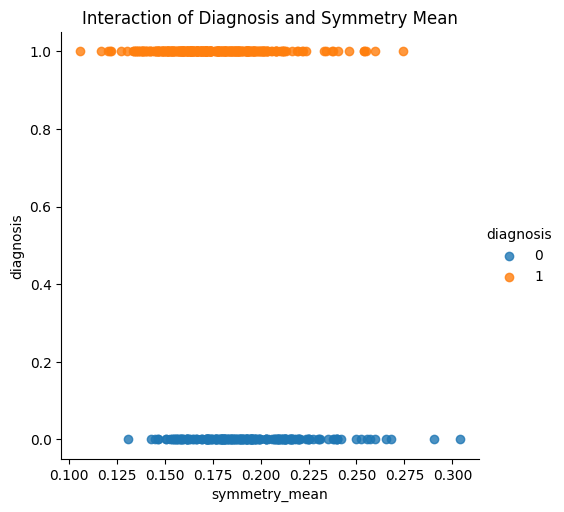

In [ ]:
# I chose to explore interactions between 'diagnosis' and 3 other variables - radius_mean, texture_mean and symmetry_mean

# Plot the interaction of 'diagnosis' with 'radius_mean'
sns.lmplot(x='radius_mean', y='diagnosis', data=cancer_df, hue='diagnosis', logistic=True)
plt.title('Interaction of Diagnosis and Radius Mean')

# Plot the interaction of 'diagnosis' with 'texture_mean'
sns.lmplot(x='texture_mean', y='diagnosis', data=cancer_df, hue='diagnosis', logistic=True)
plt.title('Interaction of Diagnosis and Texture Mean')

# Plot the interaction of 'diagnosis' with 'symmetry_mean'
sns.lmplot(x='symmetry_mean', y='diagnosis', data=cancer_df, hue='diagnosis', logistic=True)
plt.title('Interaction of Diagnosis and Symmetry Mean')

plt.show()

The plots above visually suggest no interaction due to the parallel clustering of points for different diagnosis categories.

### ISSUES WITH USING LINEAR MODEL TO PREDICT BINARY OUTCOMES:

1. Linear regression can predict values outside the 0-1 range, which are not valid probabilities. For a binary outcome, all predictions should logically fall between 0 and 1.

2.  Linear regression assumes that the residuals (errors) are normally distributed. However, with binary outcomes, the error distribution can be binomial, leading to incorrect standard errors and confidence intervals.

3. Linear regression assumes constant variance of residuals. In binary outcomes, variance is not constant and typically changes with the predicted probability, leading to heteroscedasticity.

4. The model assumes a linear relationship between independent variables and the dependent variable. In binary outcomes, this relationship is often not linear.

5. The coefficients in linear regression are meant to represent the change in the outcome for a unit change in the predictor. With a binary outcome, these changes are not additive, making the coefficients difficult to interpret meaningfully.

6. A linear regression model is unlikely to fit a binary outcome dataset properly, leading to poor model performance and predictive accuracy.

In [ ]:
# Prepare the dataset for modeling
cancer_df.columns = cancer_df.columns.str.replace(' ', '_')

# Defining the dependent and independent variables
dependent_var = 'diagnosis'
independent_vars = cancer_df.columns.drop(dependent_var)

# Constructing the regression formula
formula = dependent_var + ' ~ ' + ' + '.join(independent_vars) + ' + diagnosis:radius_mean + diagnosis:texture_mean + diagnosis:symmetry_mean'

interaction_reg = smf.ols(formula, data=cancer_df).fit()

# Model analysis
print(interaction_reg.summary())


                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4095.
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        20:41:38   Log-Likelihood:                 1181.0
No. Observations:                 569   AIC:                            -2294.
Df Residuals:                     535   BIC:                            -2146.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

1. The linear regression model summary shows p-values of zero for the interaction terms between 'diagnosis' and each of the continuous variables 'radius_mean', 'texture_mean', and 'symmetry_mean'. This suggests that these interactions are highly statistically significant, implying that the effect of these continuous variables on the diagnosis is different depending on whether the diagnosis is 0 or 1.

2. Interpreting these interactions:
*   diagnosis:radius_mean: The positive coefficient suggests that for a one-unit increase in 'radius_mean', the value of 'diagnosis' increases by 0.039, on average. This implies that 'radius_mean' is an important factor in the 'diagnosis' and has a positive relationship with the likelihood of a diagnosis of 1.
*   diagnosis:texture_mean: Similarly, the significant positive coefficient (0.0061) for 'texture_mean' interaction indicates a smaller but still positive effect on 'diagnosis'.
*  diagnosis:symmetry_mean: This interaction has a much larger coefficient (1.7255), indicating a strong positive relationship with the 'diagnosis'. This suggests that 'symmetry_mean' has a significant influence on the 'diagnosis'.

3. The implications of these findings are that the interaction between diagnosis status and these continuous variables is meaningful. However, the coefficients from linear regression aren't probabilities and can be misleading for binary data. For accurate interpretation, especially for probabilities and odds ratios, these findings should be re-evaluated using logistic regression, which is designed for binary outcomes.





## 5. **Feature Selection and Cross-Validation: Full vs. Reduced Model**
- Create a reduced model using only a subset of significant predictors. You can use methods like FDR Cutoff, forward selection, backward elimination, or any other appropriate feature selection technique.
- Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.
- Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why.

##NOTE:

##Full model with all predictors:
Upon fitting the logistic regression model (incl. all the predictor variables) to the data in question 2, I've encountered significant multicollinearity among the predictors, as shown by inflated standard errors.

This undermines the reliability of the coefficient estimates, which may not accurately represent the relationship between the predictors and the dependent variable.


##Subsequent stages:
1. Full model for Q5: To address multicollinearity, I've removed highly correlated predictors (with VIF >10) from the model in the subsequent stages. I chose this model as my full model for question 5.

2. Reduced model for Q5:
A 10% threshold is a balance between being too lenient and too strict. So I chose q = 0.1 to perform FDR control and get significant predictors. I then fit a new logistic model with only the significant predictors to the data. This will be my reduced model for this question.

Both of these models, their summaries and p-value plots have already been obtained/shown in question 2.

In [ ]:
# Calculate the R^2 value of the full model
r_squared = 1 - (full_model.deviance / full_model.null_deviance)
# Print the R^2 value of the full model
print(f"R^2 value of the full model is: {r_squared:.4f}")

R^2 value of the full model is: 0.8379


In [ ]:
# Reduced model has already been obtained in Question 2 by using FDR control
# Print the R^2 value for the reduced model
print(f"R^2 value of the reduced model is: {r_squared_cut:.4f}")

R^2 value of the reduced model is: 0.8226


In [ ]:
# Function to compute R^2 and deviance of a model
def deviance(y, pred):
    y = np.array(y)
    pred = np.array(pred)
    return -2 * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

def R2(y, pred):
    dev_val = deviance(y, pred)
    dev0 = deviance(y, [np.mean(y)] * len(y))
    return 1 - dev_val / dev0

In [ ]:
# Setup the experiment
n = len(cancer_df)
K = 10
foldid = np.tile(np.arange(1, K+1), int(np.ceil(n/K)))[:n]
np.random.shuffle(foldid)

# Empty lists to store results
OOS_full = []
OOS_cut = []
accuracy_full = []
accuracy_cut = []
confusion_matrices_full = []
confusion_matrices_cut = []

# Selected full model predictors
selected_predictors_full = ['texture_se','area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'concavity_worst']

# Perform 10-fold cross-validation
for k in range(1, K+1):
    train_idx = np.where(foldid != k)[0]
    test_idx = np.where(foldid == k)[0]

    # Full model
    X_full_train = sm.add_constant(cancer_df[['diagnosis'] + selected_predictors_full].iloc[train_idx].drop('diagnosis', axis=1))
    y_train = cancer_df['diagnosis'].iloc[train_idx]
    rfull = sm.GLM(y_train, X_full_train, family=sm.families.Binomial()).fit()

    # Cut model
    X_cut_train = sm.add_constant(cancer_df[['diagnosis'] + significant_predictors].iloc[train_idx].drop('diagnosis', axis=1))
    rcut = sm.GLM(y_train, X_cut_train, family=sm.families.Binomial()).fit()

    # Obtain predictions for full model
    X_full_test = sm.add_constant(cancer_df[['diagnosis'] + selected_predictors_full].iloc[test_idx].drop('diagnosis', axis=1))
    pred_full = rfull.predict(X_full_test)
    pred_full_class = (pred_full > 0.5).astype(int)  # Convert probabilities to 0 or 1

    # Obtain predictions for reduced model
    X_cut_test = sm.add_constant(cancer_df[['diagnosis'] + significant_predictors].iloc[test_idx].drop('diagnosis', axis=1))
    pred_cut = rcut.predict(X_cut_test)
    pred_cut_class = (pred_cut > 0.5).astype(int)  # Convert probabilities to 0 or 1

    # Calculate R^2 for both the models and store them
    y_test = cancer_df['diagnosis'].iloc[test_idx]
    OOS_full.append(R2(y_test, pred_full))
    OOS_cut.append(R2(y_test, pred_cut))

    # Calculate accuracy for both the models and store them
    accuracy_full.append(accuracy_score(y_test, pred_full_class))
    accuracy_cut.append(accuracy_score(y_test, pred_cut_class))

    # Calculate and store the confusion matrix
    cm_full = confusion_matrix(y_test, pred_full_class)
    cm_cut = confusion_matrix(y_test, pred_cut_class)
    confusion_matrices_full.append(cm_full)
    confusion_matrices_cut.append(cm_cut)

In [ ]:
# Print the out-of-sample R^2 values of the full model
OOS_full

[0.9046110951481846,
 0.36314345522918445,
 0.8322993827987906,
 0.8268208330097787,
 0.7044591513505954,
 0.8883253715918147,
 0.5646401152500027,
 0.8858908081946226,
 0.936641301176293,
 0.8757468165519305]

In [ ]:
# Print the out-of-sample R^2 values of the reduced model
OOS_cut

[0.9179620303261803,
 0.48289730628272565,
 0.8459170942471372,
 0.8182025272762224,
 0.7235822711246467,
 0.8688357280489918,
 0.5842591623316798,
 0.8865761600273754,
 0.9247295387621981,
 0.882142332257601]

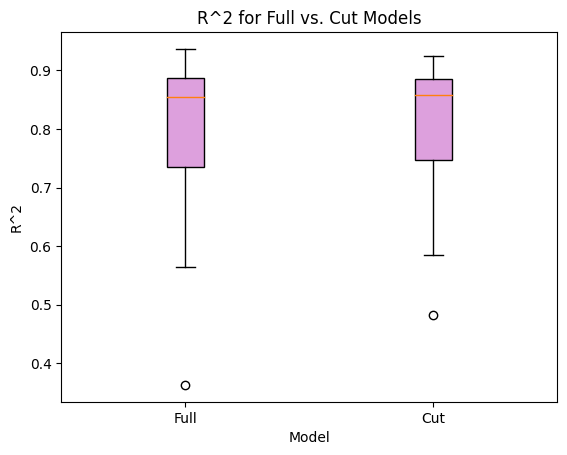

In [ ]:
# Cleaning the out-of-sample full model R^2 values
OOS_full_cleaned = [value for value in OOS_full if not np.isinf(value) and not np.isnan(value)]

plt.boxplot([OOS_full_cleaned, OOS_cut], labels=['Full', 'Cut'], patch_artist=True, boxprops=dict(facecolor="plum"))
plt.ylabel('R^2')
plt.xlabel('Model')
plt.title('R^2 for Full vs. Cut Models')
plt.show()

In [ ]:
# Calculate average out-of-sample R^2 values for each full and reduced model
avg_OOS_full = np.mean(OOS_full)
avg_OOS_cut = np.mean(OOS_cut)
print("Average OOS R^2 for Full Model:", avg_OOS_full)
print("Average OOS R^2 for Cut Model:", avg_OOS_cut)
print("Average Accuracy for Full Model:", np.mean(accuracy_full))
print("Average Accuracy for Cut Model:", np.mean(accuracy_cut))
print("Confusion Matrices for Full Model:")
print(confusion_matrices_full)
print("Confusion Matrices for Cut Model:")
print(confusion_matrices_cut)

Average OOS R^2 for Full Model: 0.7782578330301198
Average OOS R^2 for Cut Model: 0.7935104150684757
Average Accuracy for Full Model: 0.9508458646616542
Average Accuracy for Cut Model: 0.9526002506265664
Confusion Matrices for Full Model:
[array([[21,  1],
       [ 0, 35]]), array([[21,  3],
       [ 1, 32]]), array([[14,  1],
       [ 1, 41]]), array([[16,  1],
       [ 1, 39]]), array([[22,  3],
       [ 2, 30]]), array([[26,  1],
       [ 1, 29]]), array([[20,  3],
       [ 6, 28]]), array([[19,  2],
       [ 0, 36]]), array([[16,  0],
       [ 0, 41]]), array([[21,  1],
       [ 0, 34]])]
Confusion Matrices for Cut Model:
[array([[21,  1],
       [ 0, 35]]), array([[21,  3],
       [ 0, 33]]), array([[14,  1],
       [ 1, 41]]), array([[16,  1],
       [ 1, 39]]), array([[21,  4],
       [ 2, 30]]), array([[25,  2],
       [ 1, 29]]), array([[21,  2],
       [ 5, 29]]), array([[19,  2],
       [ 0, 36]]), array([[16,  0],
       [ 0, 41]]), array([[21,  1],
       [ 0, 34]])]


Full Model vs. Reduced Model:

The Full Model explains about 77.72% of the variance for new data, with an average out-of-sample R^2 of 0.7772.

The Reduced Model does a bit better, explaining around 79.48% of the variance, with an out-of-sample R^2 of 0.7948.

Evaluation:

The reduced model has a slightly higher average out-of-sample R^2 value compared to the full model. This suggests that the reduced model performs better in explaining the variance of the outcome variable on new, out-of-sample data.

Despite using fewer predictors, the reduced model does not suffer from a loss of explanatory power. In fact, it slightly improves upon the full model's performance. This could be due to the removal of predictors that do not contribute significantly to the model, which can reduce noise and potential overfitting.

For its model simplicity and parsimony, the reduced model is more efficient as it performs slightly better with fewer variables.